#### Nama: Ahmad Yusuf Aditama
#### NIM: 09011381621098
#### Kelas: SK 5 B

# FUZZY LOGIC: PENGARUH KECEPATAN & JARAK TERHADAP TINGKAT KEBOROSAN BENSIN

            Pada kasus ini, akan digunakan metode fuzzy triangular (segitiga). Terdapat 2 jenis variabel yang digunakan sebagai input dan 1 jenis variabel pada output, yaitu: 

1) Input:
     - Jarak tempuh
        Universe: Seberapa jauh jarak yang ditempuh dari 0 sampai 10 Km?
        Fuzzy: Jauh, Sedang, Dekat 
        Sensor yang digunakan: Sensor Jarak
     - Kecepatan Motor
        Universe: Seberapa cepat motor berjalan dari 20 sampai 80 Km/Jam?
        Fuzzy: Cepat, Sedang, Lambat
        Sensor yang digunakan: Sensor Kecepatan
        
2) Output:
    - Bensin
        Universe: Seberapa boros bensin dari 0 sampai 15 Liter?
        Fuzzy: Boros, lumayan, tidak boros
        Output: Pengukur taraf keborosan bensin

Pertama, definisikan nilai dari setiap variabel menggunakan skfuzzy control system

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# FUZZIFIKASI

In [2]:
#Definisi nilai setiap variabel
jarak = ctrl.Antecedent(np.arange(0, 11, 1), 'jarak')
kecepatan = ctrl.Antecedent(np.arange(20, 81, 1), 'kecepatan')
bensin = ctrl.Consequent(np.arange(0, 16, 1), 'bensin')

In [3]:
#Definisi nilai jarak untuk membership function
jarak['dekat'] = fuzz.trimf(jarak.universe,[0, 0, 5])
jarak['sedang'] = fuzz.trimf(jarak.universe,[0, 5, 10])
jarak['jauh'] = fuzz.trimf(jarak.universe,[5,10,10])

#Definisi nilai kecepatan untuk membership function
kecepatan['lambat'] = fuzz.trimf(kecepatan.universe,[20, 20, 40])
kecepatan['sedang'] = fuzz.trimf(kecepatan.universe,[20, 40, 80])
kecepatan['cepat'] = fuzz.trimf(kecepatan.universe,[40,80,80])

#Definisi nilai bensin untuk membership function
bensin['tidak boros'] = fuzz.trimf(bensin.universe,[0, 0, 7])
bensin['sedang'] = fuzz.trimf(bensin.universe,[0, 7, 15])
bensin['boros'] = fuzz.trimf(bensin.universe,[7, 15, 15])

Rumus fungsi segitiga adalah seperti pada gambar berikut:
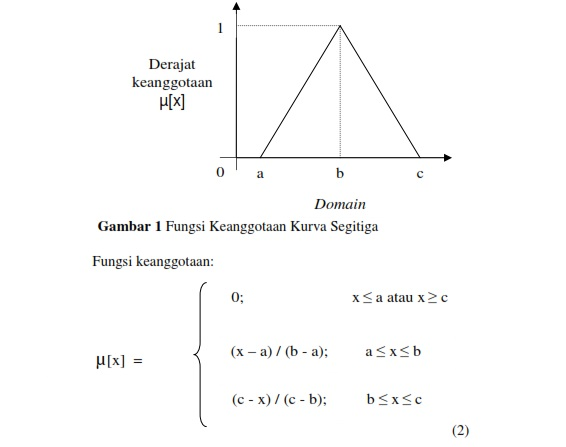

Jarak memiliki 3 nilai Linguistik, yaitu nilai Dekat, Sedang, dan Jauh. Maka fungsi keanggotaannya dapat dirumuskan sebagai berikut:
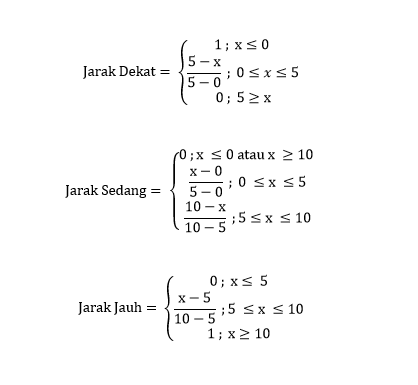

C:\Users\Excalibur\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


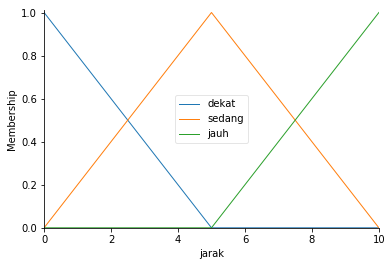

In [4]:
jarak.view()

Kecepatan memiliki 3 nilai Linguistik, yaitu nilai Lambat, Sedang, dan Cepat. Maka fungsi keanggotaannya dapat dirumuskan sebagai berikut:
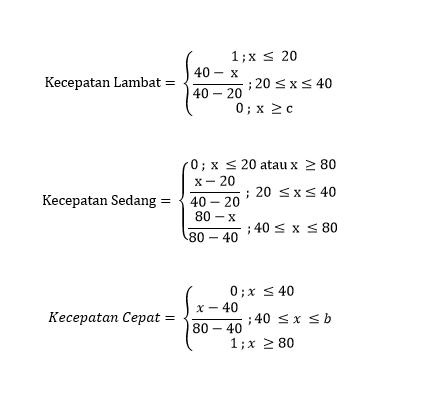

C:\Users\Excalibur\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


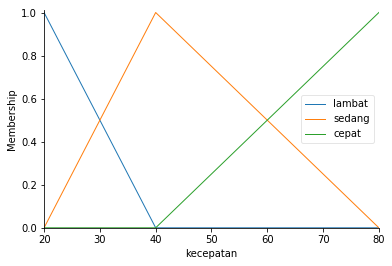

In [5]:
kecepatan.view()

Bensin memiliki 3 nilai Linguistik, yaitu nilai Tidak Boros, Sedang, dan Boros. Maka fungsi keanggotaannya dapat dirumuskan sebagai berikut:
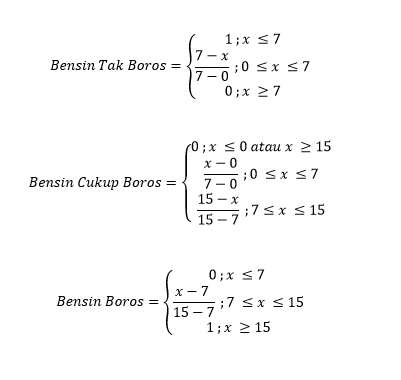

C:\Users\Excalibur\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


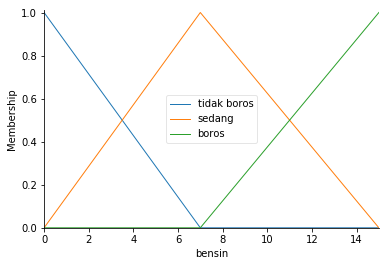

In [6]:
bensin.view()

# Menentukan Derajat Keanggotaan

Nilai Input: 
    - Jarak: 7
    - Kecepatan: 58
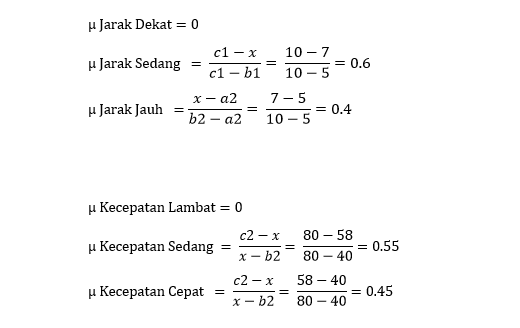

# Rule Base

Pada variabel persediaan terdapat 3 himpunan dan pada variabel permintaan terdapat 3 himpunan, maka didapatkan jumlah rule base sebanyak 9 rules. Berikut merupakan Rules yang telah ditetapkan.
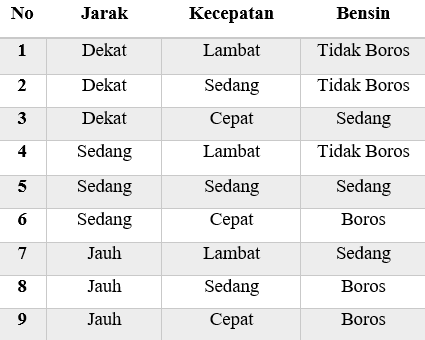

# Inferensi

In [7]:
rule1 = ctrl.Rule(jarak['dekat'] & kecepatan['lambat'], bensin['tidak boros'])
rule2 = ctrl.Rule(jarak['dekat'] & kecepatan['sedang'], bensin['tidak boros'])
rule3 = ctrl.Rule(jarak['dekat'] & kecepatan['cepat'], bensin['sedang'])
rule4 = ctrl.Rule(jarak['sedang'] & kecepatan['lambat'], bensin['tidak boros'])
rule5 = ctrl.Rule(jarak['sedang'] & kecepatan['sedang'], bensin['sedang'])
rule6 = ctrl.Rule(jarak['sedang'] & kecepatan['cepat'], bensin['boros'])
rule7 = ctrl.Rule(jarak['jauh'] & kecepatan['lambat'], bensin['sedang'])
rule8 = ctrl.Rule(jarak['jauh'] & kecepatan['sedang'], bensin['boros'])
rule9 = ctrl.Rule(jarak['jauh'] & kecepatan['cepat'], bensin['boros'])


Hasil dengan menggunakan Matlab:

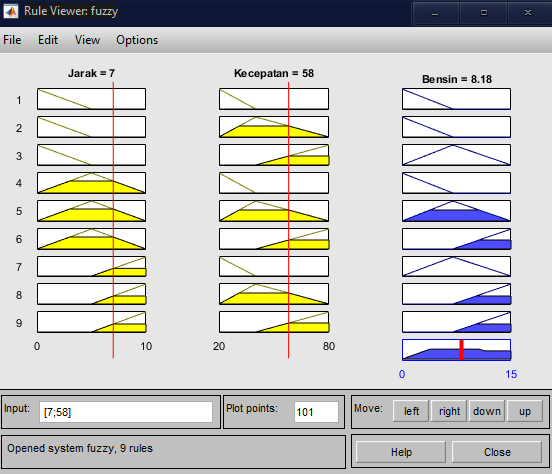

# MENENTUKAN α PREDIKAT

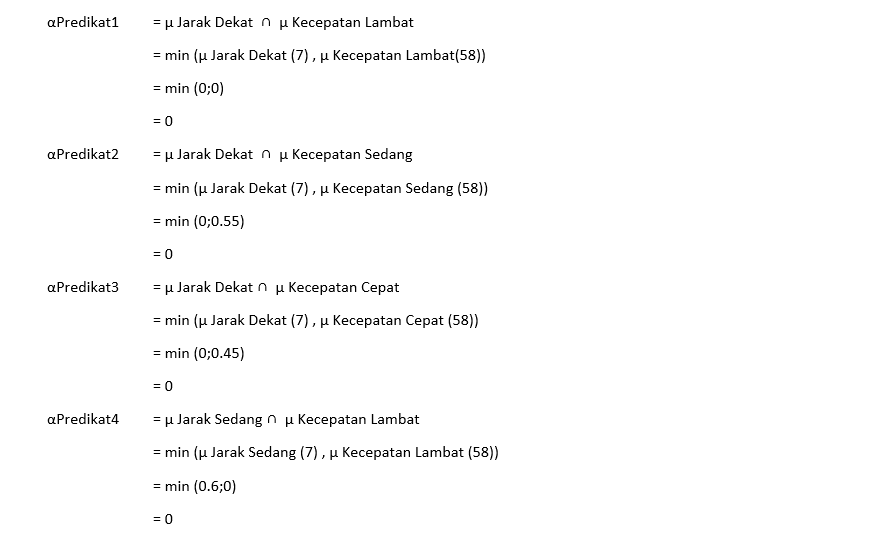
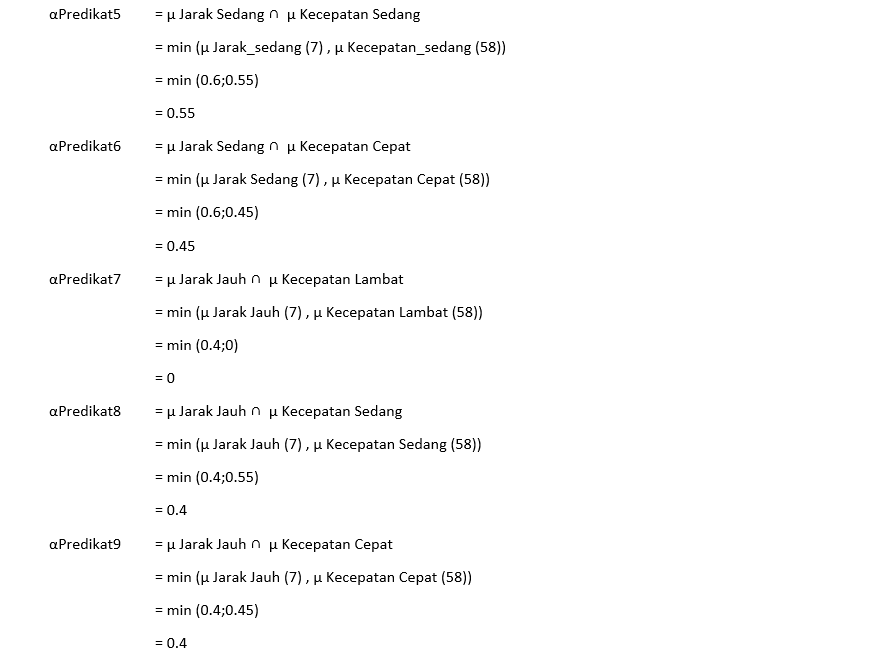

In [8]:
criming_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [9]:
criming = ctrl.ControlSystemSimulation(criming_ctrl)

criming.input['jarak'] = 7
criming.input['kecepatan'] = 58

criming.compute()

# KOMPOSISI

Komposisi Rule αPredikat (5, 6, 8, 9)
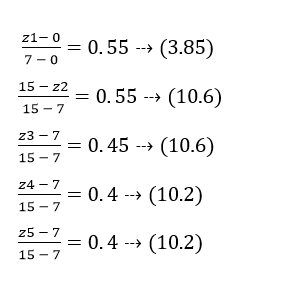

# DEFUZZIFIKASI

Hasil Defuzzifikasi dengan Perhitungan Manual:
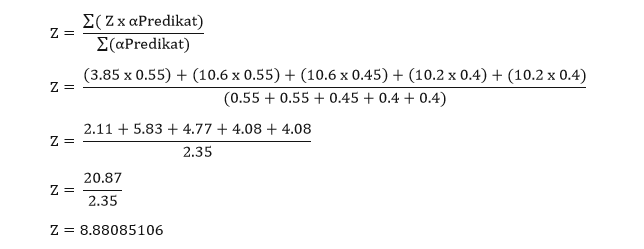

Hasil Defuzzifikasi dengan menggunakan Python:

In [10]:
print (criming.output['bensin'])

8.152938475665751


C:\Users\Excalibur\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


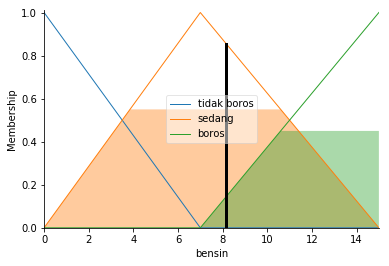

In [11]:
bensin.view(sim=criming)